# **Amazon Sales Report**

In [1953]:
# Import all library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [1954]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Understanding and Preparation**

In [1955]:
# to set the figure size of grapgh/ managing the figure size
mpl.rcParams['figure.figsize'] = (15, 6)
mpl.rcParams['axes.grid'] = False


In [1956]:
# load the file path of the data
file_path="/content/drive/MyDrive/Amazon Sale Report.csv"
data=pd.read_csv(file_path)
data.head()


index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel ship-service-level  Category Size Courier Status  \
0   Merchant     Amazon.in           Standard   T-shirt    S     On the Way   
1   Merchant     Amazon.in           Standard     Shirt  3XL        Shipped   
2     Amazon     Amazon.in          Expedited     Shirt   XL        Shipped   
3   Merchant     Amazon.in           Standard   Blazzer    L     On the Way   
4     Amazon     Amazon.in          Expedited  Trousers  3XL        Shipped   

   ...  currency  Amount    ship-city   ship-state ship-postal-code  \
0  ...       INR  647.62       MUMBAI  MAHARASHTRA         400081.0   
1  ...       INR  406.00    BENGALURU    KARNATAKA         560085.0   
2  ...       INR  329.00  NAVI MUMBAI  MAHARASHTRA         410210.0   
3  ...       INR  753.33   PUDUCHERRY   PUDUCHERRY         605008.0   
4  ...       INR  574.00      CHENNAI   TAMIL NADU         600073.0   

   ship-country    B2B  fulfilled-by New  PendingS  
0            IN  False     Easy Ship NaN       NaN  
1            IN  False     Easy Ship NaN       NaN  
2            IN   True           NaN NaN       NaN  
3            IN  False     Easy Ship NaN       NaN  
4            IN  False           NaN NaN       NaN  

[5 rows x 21 columns]

In [1957]:
# information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [1958]:
# describes the data
data.describe().transpose()

count           mean            std       min        25%  \
index             128976.0   64486.130427   37232.897832       0.0   32242.75   
Qty               128976.0       0.904401       0.313368       0.0       1.00   
Amount            121176.0     648.562176     281.185041       0.0     449.00   
ship-postal-code  128941.0  463945.677744  191458.488954  110001.0  382421.00   
New                    0.0            NaN            NaN       NaN        NaN   
PendingS               0.0            NaN            NaN       NaN        NaN   

                       50%        75%       max  
index              64486.5   96730.25  128974.0  
Qty                    1.0       1.00      15.0  
Amount               605.0     788.00    5584.0  
ship-postal-code  500033.0  600024.00  989898.0  
New                    NaN        NaN       NaN  
PendingS               NaN        NaN       NaN

In [1959]:
# check the column in the data
data.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')

In [1960]:
# drop the coulmn of NEW and Pendings
data.drop(['New','PendingS'],axis=1,inplace=True)

In [1961]:
# information about the data column after dropping some column
data.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [1962]:
# print some values of the data
data.head()

index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel ship-service-level  Category Size Courier Status  \
0   Merchant     Amazon.in           Standard   T-shirt    S     On the Way   
1   Merchant     Amazon.in           Standard     Shirt  3XL        Shipped   
2     Amazon     Amazon.in          Expedited     Shirt   XL        Shipped   
3   Merchant     Amazon.in           Standard   Blazzer    L     On the Way   
4     Amazon     Amazon.in          Expedited  Trousers  3XL        Shipped   

   Qty currency  Amount    ship-city   ship-state  ship-postal-code  \
0    0      INR  647.62       MUMBAI  MAHARASHTRA          400081.0   
1    1      INR  406.00    BENGALURU    KARNATAKA          560085.0   
2    1      INR  329.00  NAVI MUMBAI  MAHARASHTRA          410210.0   
3    0      INR  753.33   PUDUCHERRY   PUDUCHERRY          605008.0   
4    1      INR  574.00      CHENNAI   TAMIL NADU          600073.0   

  ship-country    B2B fulfilled-by  
0           IN  False    Easy Ship  
1           IN  False    Easy Ship  
2           IN   True          NaN  
3           IN  False    Easy Ship  
4           IN  False          NaN

In [1963]:
# statistics of the data
data.describe()

index            Qty         Amount  ship-postal-code
count  128976.000000  128976.000000  121176.000000     128941.000000
mean    64486.130427       0.904401     648.562176     463945.677744
std     37232.897832       0.313368     281.185041     191458.488954
min         0.000000       0.000000       0.000000     110001.000000
25%     32242.750000       1.000000     449.000000     382421.000000
50%     64486.500000       1.000000     605.000000     500033.000000
75%     96730.250000       1.000000     788.000000     600024.000000
max    128974.000000      15.000000    5584.000000     989898.000000

# **Check the outlier in the data**

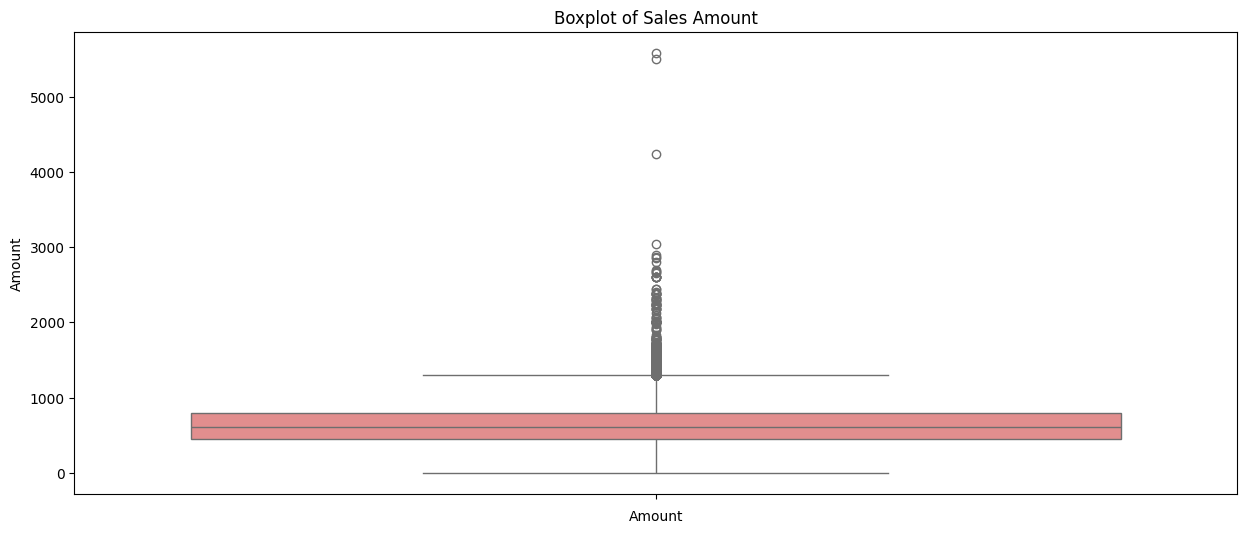

In [1964]:
# Boxplot for Amount to check for outliers
sns.boxplot(data['Amount'], color='lightcoral')
plt.title('Boxplot of Sales Amount')
plt.xlabel('Amount')
plt.show()

# **Handle the outlier**

In [1965]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['Amount'].quantile(0.25)
Q3 = data['Amount'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_cleaned_no_outliers = data[(data['Amount'] >= lower_bound) & (data['Amount'] <= upper_bound)]

# Verify the shape of the data
print("Original data shape:", data.shape)
print("Cleaned data shape:", data_cleaned_no_outliers.shape)


Original data shape: (128976, 19)
Cleaned data shape: (117575, 19)


Cap Outliers:Capping outliers involves setting extreme values to the nearest acceptable value.

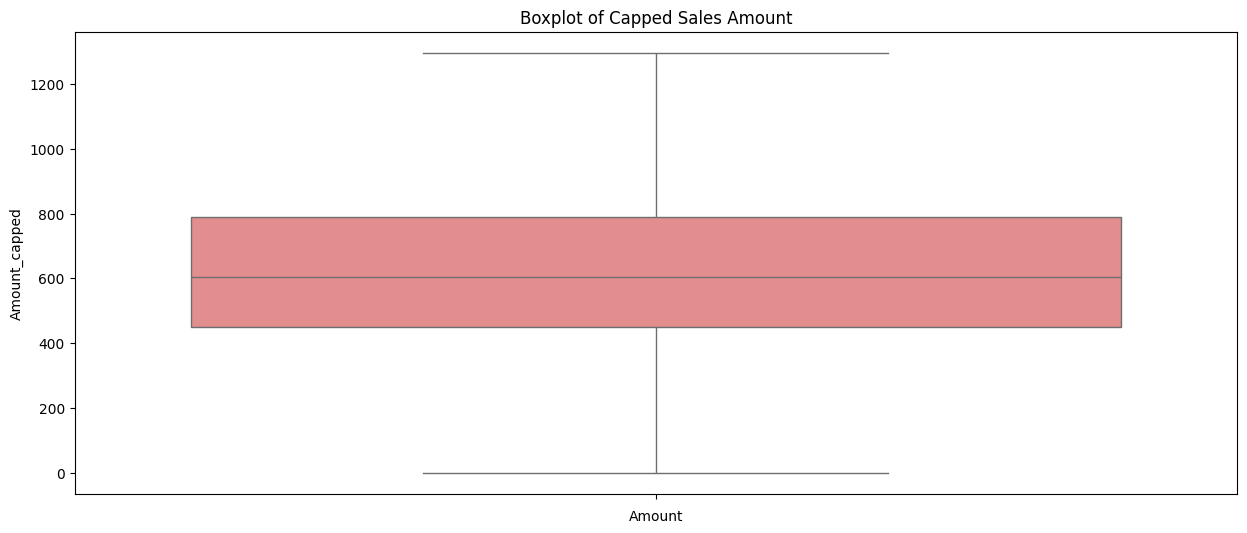

In [1966]:
# Cap outliers
data['Amount_capped'] = np.where(data['Amount'] > upper_bound, upper_bound,
                                 np.where(data['Amount'] < lower_bound, lower_bound, data['Amount']))

# Verify the changes
sns.boxplot(data['Amount_capped'], color='lightcoral')
plt.title('Boxplot of Capped Sales Amount')
plt.xlabel('Amount')
plt.show()


Summary Statistics: After handling outliers

In [1967]:
print("Summary Statistics for Amount:")
print(data['Amount'].describe())

print("\nSummary Statistics for Capped Amount:")
print(data['Amount_capped'].describe())


Summary Statistics for Amount:
count    121176.000000
mean        648.562176
std         281.185041
min           0.000000
25%         449.000000
50%         605.000000
75%         788.000000
max        5584.000000
Name: Amount, dtype: float64

Summary Statistics for Capped Amount:
count    121176.000000
mean        644.427142
std         268.381005
min           0.000000
25%         449.000000
50%         605.000000
75%         788.000000
max        1296.500000
Name: Amount_capped, dtype: float64


In [1968]:
# check the unique value of the data
data.nunique()

index                 128808
Order ID              120229
Date                      91
Status                    13
Fulfilment                 2
Sales Channel              2
ship-service-level         2
Category                   9
Size                      11
Courier Status             4
Qty                       10
currency                   1
Amount                  1408
ship-city               8948
ship-state                69
ship-postal-code        9454
ship-country               1
B2B                        2
fulfilled-by               1
Amount_capped           1238
dtype: int64

# **Check the missing values and its percentage in the data**

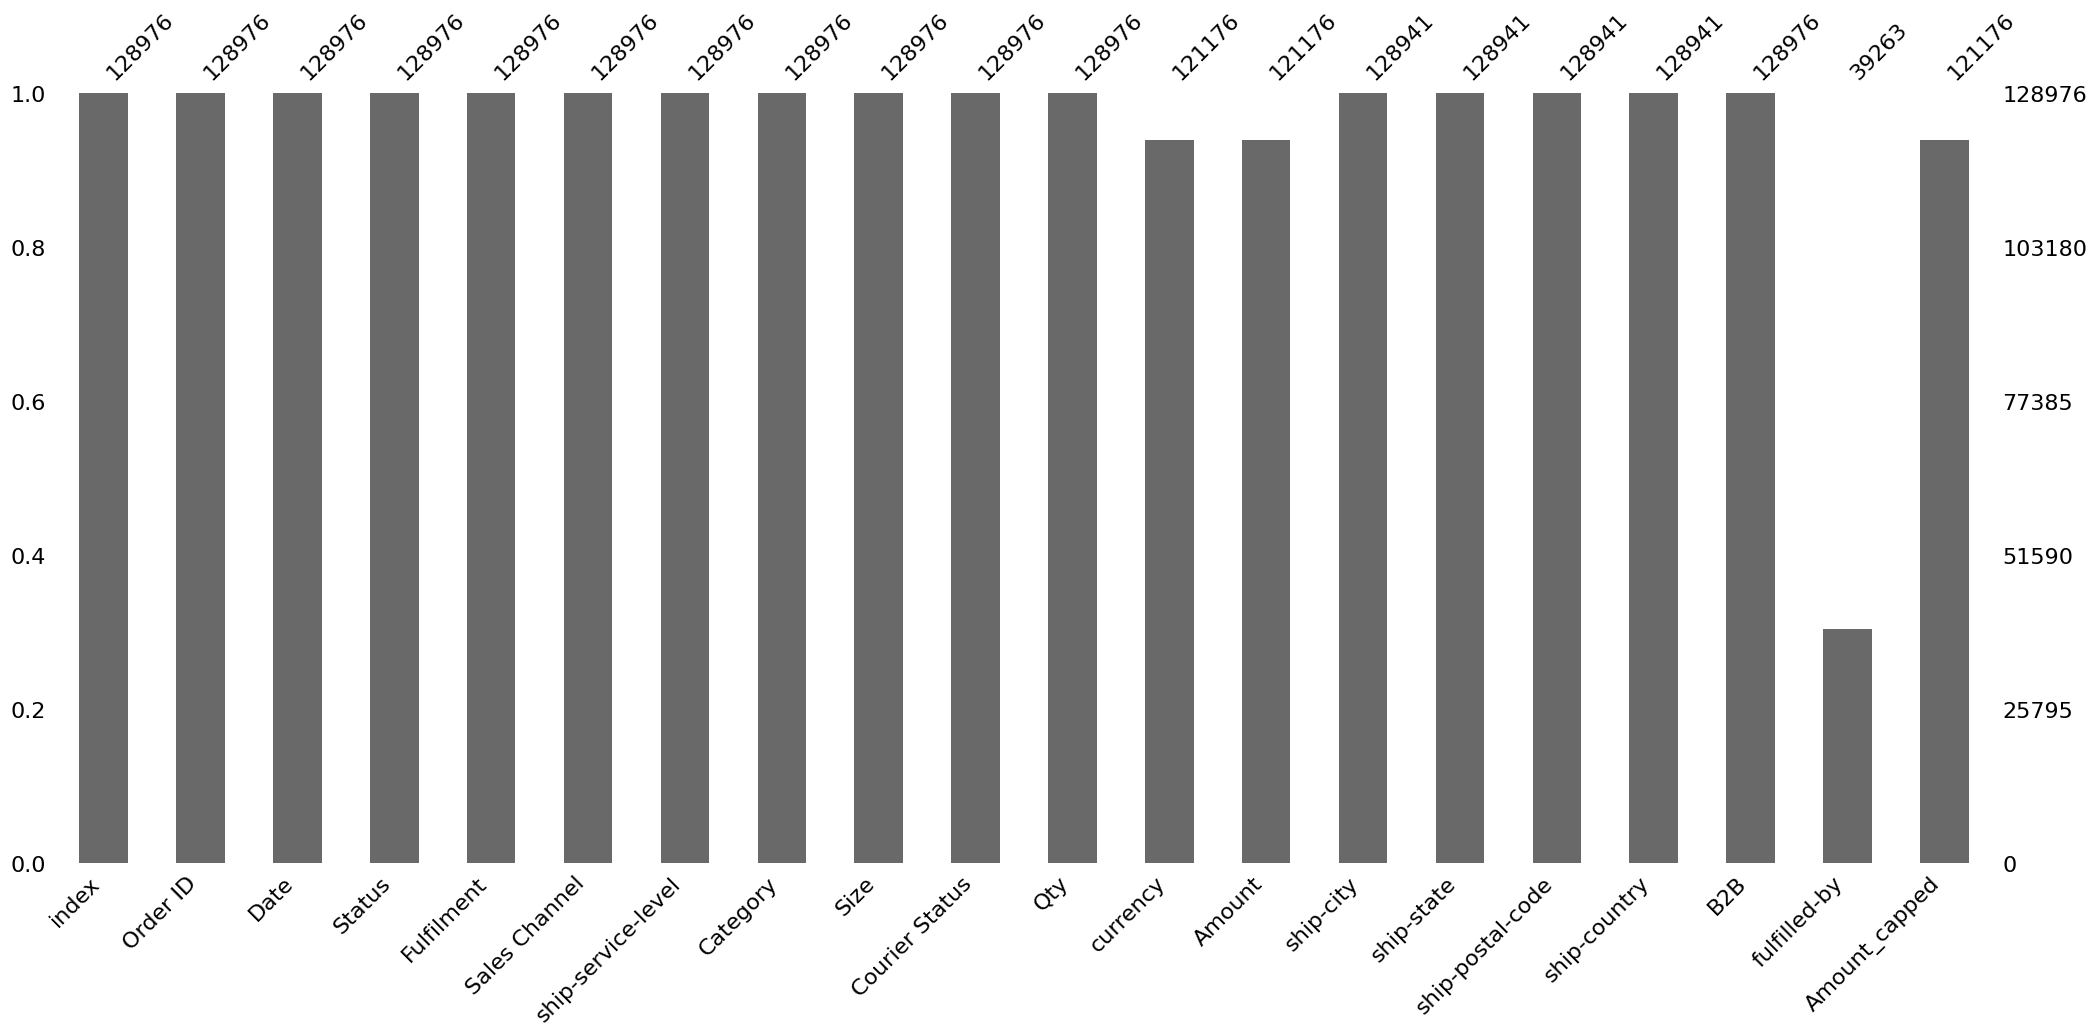

In [1969]:
import missingno
missingno.bar(data)
plt.show()


In [1970]:
#test null values
percent_missing = data.isna().sum()* 100 / len(data)
missing_value = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing})
missing_value


column_name  percent_missing
index                            index         0.000000
Order ID                      Order ID         0.000000
Date                              Date         0.000000
Status                          Status         0.000000
Fulfilment                  Fulfilment         0.000000
Sales Channel            Sales Channel         0.000000
ship-service-level  ship-service-level         0.000000
Category                      Category         0.000000
Size                              Size         0.000000
Courier Status          Courier Status         0.000000
Qty                                Qty         0.000000
currency                      currency         6.047637
Amount                          Amount         6.047637
ship-city                    ship-city         0.027137
ship-state                  ship-state         0.027137
ship-postal-code      ship-postal-code         0.027137
ship-country              ship-country         0.027137
B2B                                B2B         0.000000
fulfilled-by              fulfilled-by        69.557902
Amount_capped            Amount_capped         6.047637

Text(0.5, 0, 'columns')

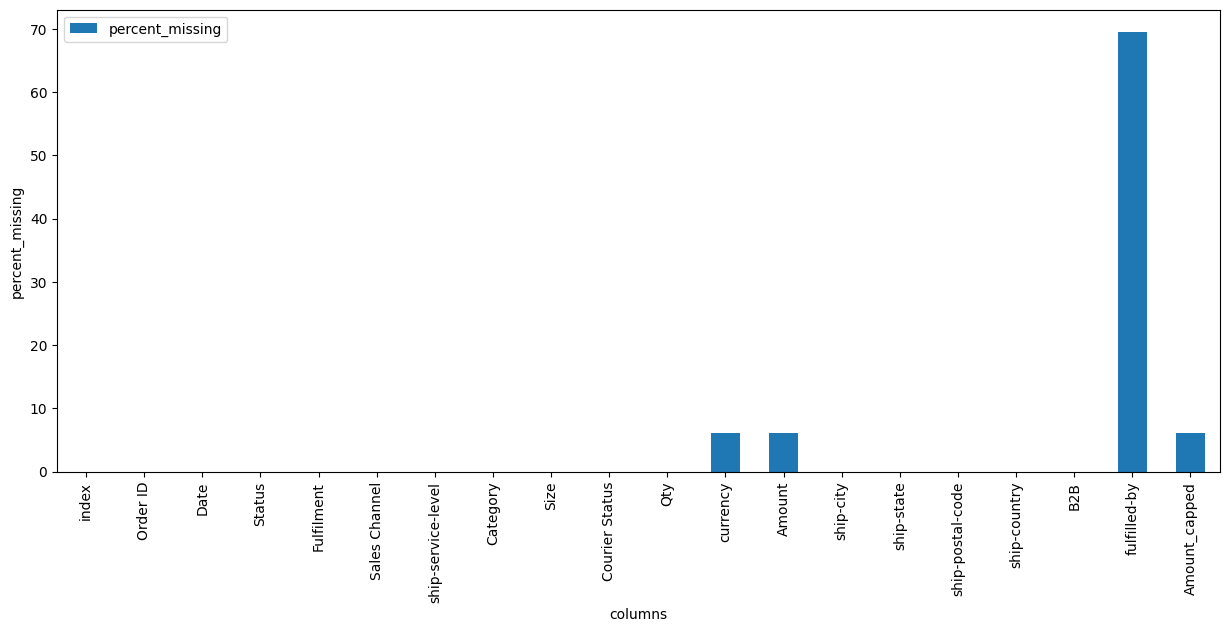

In [1971]:
missing_value.plot(kind='bar')
plt.ylabel('percent_missing')
plt.xlabel('columns')

In [1972]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Check for duplicate values in the dataset
duplicate_value = data.duplicated().sum()

In [1973]:
# Display missing values and duplicate records
print("Missing Values:\n",missing_values)
print("\nDuplicate Records:",duplicate_value)

Missing Values:
 index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               7800
Amount                 7800
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
Amount_capped          7800
dtype: int64

Duplicate Records: 168


# ***Handle the missing values and duplicates value in the data***

In [1974]:
# Remove duplicate records
data_cleaned = data.drop_duplicates()

# Handle missing values for currency and Amount by removing those records
data_cleaned = data_cleaned.dropna(subset=['currency', 'Amount'])

# Handle missing values for ship-city, ship-state, ship-postal-code, and ship-country by removing those records
data_cleaned = data_cleaned.dropna(subset=['ship-city', 'ship-state', 'ship-postal-code', 'ship-country'])

# Display the number of missing values after cleaning
missing_values= data_cleaned.isnull().sum()

# Display the first few rows of the cleaned dataset
data_cleaned.head(), missing_values


(   index             Order ID      Date                        Status  \
 0      0  405-8078784-5731545  04-30-22                     Cancelled   
 1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
 2      2  404-0687676-7273146  04-30-22                       Shipped   
 3      3  403-9615377-8133951  04-30-22                     Cancelled   
 4      4  407-1069790-7240320  04-30-22                       Shipped   
 
   Fulfilment Sales Channel ship-service-level  Category Size Courier Status  \
 0   Merchant     Amazon.in           Standard   T-shirt    S     On the Way   
 1   Merchant     Amazon.in           Standard     Shirt  3XL        Shipped   
 2     Amazon     Amazon.in          Expedited     Shirt   XL        Shipped   
 3   Merchant     Amazon.in           Standard   Blazzer    L     On the Way   
 4     Amazon     Amazon.in          Expedited  Trousers  3XL        Shipped   
 
    Qty currency  Amount    ship-city   ship-state  ship-postal-code  \


In [1975]:
# Convert the 'Date' column to datetime format to ensure proper date handling
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'])

# Set the 'Date' column as the index for easier time-based operations and resampling
data_cleaned.set_index('Date', inplace=True)

# Display the first few rows of the cleaned dataset with the new index
data_cleaned.head()

index             Order ID                        Status  \
Date                                                                   
2022-04-30      0  405-8078784-5731545                     Cancelled   
2022-04-30      1  171-9198151-1101146  Shipped - Delivered to Buyer   
2022-04-30      2  404-0687676-7273146                       Shipped   
2022-04-30      3  403-9615377-8133951                     Cancelled   
2022-04-30      4  407-1069790-7240320                       Shipped   

           Fulfilment Sales Channel ship-service-level  Category Size  \
Date                                                                    
2022-04-30   Merchant     Amazon.in           Standard   T-shirt    S   
2022-04-30   Merchant     Amazon.in           Standard     Shirt  3XL   
2022-04-30     Amazon     Amazon.in          Expedited     Shirt   XL   
2022-04-30   Merchant     Amazon.in           Standard   Blazzer    L   
2022-04-30     Amazon     Amazon.in          Expedited  Trousers  3XL   

           Courier Status  Qty currency  Amount    ship-city   ship-state  \
Date                                                                        
2022-04-30     On the Way    0      INR  647.62       MUMBAI  MAHARASHTRA   
2022-04-30        Shipped    1      INR  406.00    BENGALURU    KARNATAKA   
2022-04-30        Shipped    1      INR  329.00  NAVI MUMBAI  MAHARASHTRA   
2022-04-30     On the Way    0      INR  753.33   PUDUCHERRY   PUDUCHERRY   
2022-04-30        Shipped    1      INR  574.00      CHENNAI   TAMIL NADU   

            ship-postal-code ship-country    B2B fulfilled-by  Amount_capped  
Date                                                                          
2022-04-30          400081.0           IN  False    Easy Ship         647.62  
2022-04-30          560085.0           IN  False    Easy Ship         406.00  
2022-04-30          410210.0           IN   True          NaN         329.00  
2022-04-30          605008.0           IN  False    Easy Ship         753.33  
2022-04-30          600073.0           IN  False          NaN         574.00

# **Sales Overview**

In [1976]:
# calculate daily sales
daily_sales=data_cleaned['Amount'].resample('D').sum()
daily_sales


Date
2022-03-31     101683.85
2022-04-01     865478.60
2022-04-02     913101.53
2022-04-03    1011763.38
2022-04-04     882059.17
                 ...    
2022-06-25     654234.58
2022-06-26     773610.02
2022-06-27     714124.67
2022-06-28     772085.53
2022-06-29     411530.76
Freq: D, Name: Amount, Length: 91, dtype: float64

In [1977]:
# Ensure index is datetime and change the name of date To daily
daily_sales.index=pd.to_datetime(daily_sales.index)
daily_sales.index.name='Days'

# reset index to have daily as column and display the sresult
daily_sales=daily_sales.reset_index()
print(daily_sales)


         Days      Amount
0  2022-03-31   101683.85
1  2022-04-01   865478.60
2  2022-04-02   913101.53
3  2022-04-03  1011763.38
4  2022-04-04   882059.17
..        ...         ...
86 2022-06-25   654234.58
87 2022-06-26   773610.02
88 2022-06-27   714124.67
89 2022-06-28   772085.53
90 2022-06-29   411530.76

[91 rows x 2 columns]


In [1978]:
# plotly then plot daily sales
fig = px.line(daily_sales, x='Days', y='Amount', title='Daily Sales Trends')
fig.show()

In [1979]:
# plot groupby chart
fig = px.bar(daily_sales, x='Days', y='Amount', title='Daily Sales Bar Chart')
fig.show()

In [1980]:
# create a treemap plot
fig=px.treemap(daily_sales, path=['Days'], values='Amount', title='Daily Sales Treemap')
fig.show()

In [1981]:
# create a scatter plot
fig = px.scatter(daily_sales, x='Days', y='Amount', title='Daily Sales Scatter Plot')
fig.show()

In [1982]:
# create a stack area chart
fig = px.area(daily_sales, x='Days', y='Amount', title='Daily Sales Stacked Area Chart')
fig.show()

In [1983]:
# calculate Weekly sales
weekly_sales = data_cleaned['Amount'].resample('W').sum()
weekly_sales

Date
2022-04-03    2892027.36
2022-04-10    6694655.95
2022-04-17    6900348.42
2022-04-24    7060442.00
2022-05-01    6369525.05
2022-05-08    7187776.94
2022-05-15    5364728.55
2022-05-22    5283050.33
2022-05-29    5583804.55
2022-06-05    6168601.21
2022-06-12    6463328.67
2022-06-19    5559011.37
2022-06-26    5053074.03
2022-07-03    1897740.96
Freq: W-SUN, Name: Amount, dtype: float64

In [1984]:
# Ensure index is datetime and change the name of date To weeks
weekly_sales.index = pd.to_datetime(weekly_sales.index)
weekly_sales.index.name = 'Weeks'

# Reset index to have Weeks as a column and display the result
weekly_sales = weekly_sales.reset_index()
print(weekly_sales)


        Weeks      Amount
0  2022-04-03  2892027.36
1  2022-04-10  6694655.95
2  2022-04-17  6900348.42
3  2022-04-24  7060442.00
4  2022-05-01  6369525.05
5  2022-05-08  7187776.94
6  2022-05-15  5364728.55
7  2022-05-22  5283050.33
8  2022-05-29  5583804.55
9  2022-06-05  6168601.21
10 2022-06-12  6463328.67
11 2022-06-19  5559011.37
12 2022-06-26  5053074.03
13 2022-07-03  1897740.96


In [1985]:
# using plotly plot the bar plot
fig = px.bar(weekly_sales, x='Weeks', y='Amount', title='Weekly Sales Trends')
fig.show()


In [1986]:
# using plotly then plot the weekly sales
fig = px.scatter(weekly_sales, x='Weeks', y='Amount', title='Weekly Sales Trends')
fig.show()

In [1987]:
# create a treemap
fig = px.treemap(weekly_sales, path=['Weeks'], values='Amount', title='Weekly Sales Treemap')
fig.show()

In [1988]:
# create a stack area chart
fig = px.area(weekly_sales, x='Weeks', y='Amount', title='Weekly Sales Stacked Area Chart')
fig.show()

In [1989]:
# create a pie chart
fig = px.pie(weekly_sales, names='Weeks', values='Amount', title='Weekly Sales Pie Chart')
fig.show()


In [1990]:
# calculate the monhtly sales
monthly_sales=data_cleaned['Amount'].resample('M').sum()
monthly_sales


Date
2022-03-31      101683.85
2022-04-30    28735357.41
2022-05-31    26219850.75
2022-06-30    23421223.38
Freq: M, Name: Amount, dtype: float64

In [1991]:
# Ensure index is datetime and change the name of date To month
monthly_sales.index=pd.to_datetime(monthly_sales.index)
monthly_sales.index.name='Month'

# reset index to have month as column and display the result
monthly_sales=monthly_sales.reset_index()
print(monthly_sales)



       Month       Amount
0 2022-03-31    101683.85
1 2022-04-30  28735357.41
2 2022-05-31  26219850.75
3 2022-06-30  23421223.38


In [1992]:
# using plotly to plot the bar
fig = px.bar(monthly_sales, x='Month', y='Amount', title='Monthly Sales Trends')
fig.show()

In [1993]:
# using plotly then plot of monthly sales
fig = px.scatter(monthly_sales, x='Month', y='Amount', title='Monthly Sales Trends')
fig.show()

In [1994]:
# plot treemap plot
fig = px.treemap(monthly_sales, path=['Month'], values='Amount', title='Monthly Sales Treemap')
fig.show()

In [1995]:
# plot stack area chart
fig = px.area(monthly_sales, x='Month', y='Amount', title='Monthly Sales Stacked Area Chart')
fig.show()

In [1996]:
# plot pie chart
fig = px.pie(monthly_sales, names='Month', values='Amount', title='Monthly Sales Pie Chart')
fig.show()

In [1997]:
# calcualate quaterly sales
quarterly_sales = data_cleaned['Amount'].resample('Q').sum()
quarterly_sales

Date
2022-03-31      101683.85
2022-06-30    78376431.54
Freq: Q-DEC, Name: Amount, dtype: float64

In [1998]:
# Ensure index is datetime and change the name of date To quaterly
quarterly_sales.index=pd.to_datetime(quarterly_sales.index)
quarterly_sales.index.name='Quaterly'

# reset index to have quaterly as column and display the result
quarterly_sales=quarterly_sales.reset_index()
print(quarterly_sales)


    Quaterly       Amount
0 2022-03-31    101683.85
1 2022-06-30  78376431.54


In [1999]:
# using plotly plot the bar
fig = px.bar(quarterly_sales, x='Quaterly', y='Amount', title='Quarterly Sales Trends')
fig.show()

In [2000]:
# create a scatter plot
fig = px.scatter(quarterly_sales, x='Quaterly', y='Amount', title='Quarterly Sales Trends')
fig.show()

In [2001]:
# create a pie chart
fig = px.pie(quarterly_sales, names='Quaterly', values='Amount', title='Quarterly Sales Pie Chart')
fig.show()

# **Product Analysis**

In [2002]:
# Total sell by Category wise
data_cleaned.groupby('Category').sum(numeric_only=True)['Amount'].sort_values(ascending=True)


Category
Watch            915.00
Shoes         123933.76
Socks         150397.50
Wallet        458408.18
Perfume       789419.66
Trousers     5340325.30
Blazzer     11207771.12
Shirt       21261760.70
T-shirt     39145184.17
Name: Amount, dtype: float64

In [2003]:
# create a hist
fig = px.histogram(data_cleaned, x='Category', y='Amount', color='Category', title='Category-wise Sales')
fig.show()

In [2004]:
# Number of orders of all catogory
category_counts = data_cleaned['Category'].value_counts().reset_index()
category_counts

Category  count
0   T-shirt  46969
1     Shirt  46628
2   Blazzer  14693
3  Trousers  10149
4   Perfume   1091
5    Wallet    881
6     Socks    419
7     Shoes    155
8     Watch      3

In [2005]:
# Compute category counts
category_counts = data_cleaned['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Number of Orders']

# Create a bar plot with Plotly
fig = px.bar(category_counts, x='Category', y='Number of Orders',
             title='Distribution of Product Categories',
             color='Category',
             )
# Update layout to match your style
fig.update_layout(
    xaxis_title='Category',
    yaxis_title='Number of Orders'
)

# Show the plot
fig.show()

In [2006]:
# Distribution of product sizes
size_counts=data_cleaned['Size'].value_counts().reset_index()
size_counts

Size  count
0      M  20942
1      L  20452
2     XL  19391
3    XXL  16764
4      S  15624
5    3XL  13869
6     XS  10179
7   Free   2130
8    6XL    705
9    5XL    526
10   4XL    406

In [2007]:
# Create a bar plot with Plotly
fig = px.bar(size_counts, x='Size', y='count',
             title='Distribution of Product Sizes',
             labels={'Size': 'Product Size', 'count': 'Count'},
             color='count',
             color_continuous_scale='Viridis')

# Update layout for better appearance
fig.update_layout(
    xaxis_title='Product Size',
    yaxis_title='Count',
    xaxis=dict(tickangle=-45)
)

# Show the plot
fig.show()

# **Fulfillment Analysis**

In [2008]:
# fulfillments methods effectiveness
fulfillment_counts = data_cleaned['Fulfilment'].value_counts().reset_index()
fulfillment_counts

Fulfilment  count
0     Amazon  83524
1   Merchant  37464

In [2009]:
# plot histogram with plotly
fig = px.histogram(data_cleaned, x='Fulfilment', y='Amount', color='Fulfilment', title='Fulfillment Method-wise Sales')
fig.show()

In [2010]:
# create a pie chart
fig = px.pie(fulfillment_counts, names='Fulfilment', values='count', title='Fulfillment Method Distribution')
fig.show()

In [2011]:
# Calculate order completion rate
completion_rate = data_cleaned['Status'].value_counts(normalize=True) * 100
completion_rate= completion_rate.reset_index()
completion_rate


Status  proportion
0                         Shipped   64.046848
1    Shipped - Delivered to Buyer   23.721361
2                       Cancelled    8.881873
3    Shipped - Returned to Seller    1.608424
4             Shipped - Picked Up    0.804212
5                         Pending    0.542203
6   Pending - Waiting for Pick Up    0.232254
7   Shipped - Returning to Seller    0.119847
8      Shipped - Out for Delivery    0.028928
9     Shipped - Rejected by Buyer    0.009092
10      Shipped - Lost in Transit    0.004133
11              Shipped - Damaged    0.000827

In [2012]:
# Create a bar plot with Plotly
fig = px.bar(completion_rate, x='Status', y='proportion',
             title='Order Completion Rate',
             color='proportion',
             color_continuous_scale='Viridis')

# Update layout for better appearance
fig.update_layout(
    xaxis_title='Order Status',
    yaxis_title='Percentage',
    xaxis=dict(tickangle=-45)
)

# Show the plot
fig.show()

# **Customer Segmentation**

In [2013]:
# Segment customers by total amount spent
customer_spending = data_cleaned.groupby('Order ID').sum(numeric_only=True)['Amount']
costomer_spending=customer_spending.reset_index()
costomer_spending



Order ID  Amount
0       171-0000547-8192359   301.0
1       171-0000902-4490745   544.0
2       171-0001409-6228339   422.0
3       171-0003082-5110755   563.0
4       171-0003738-2052324   379.0
...                     ...     ...
112856  408-9997972-0411544     0.0
112857  408-9998736-9918719   499.0
112858  408-9999130-5667563     0.0
112859  408-9999627-9451551   487.0
112860  408-9999949-3394756   574.0

[112861 rows x 2 columns]

In [2014]:
# Create a histogram with Plotly
fig = px.histogram(costomer_spending, x='Amount',
                   title='Distribution of Sales Amounts',
                   labels={'Amount': 'Sales Amount'},
                   color_discrete_sequence=['royalblue'],
                   nbins=500)  # You can choose any color

# Update layout for better appearance
fig.update_layout(
    xaxis_title='Sales Amount',
    yaxis_title='Number of Customers',
    xaxis=dict(title='Sales Amount'),
    yaxis=dict(title='Number of Customers')
)

# Show the plot
fig.show()


In [2015]:
# Create a histogram with Plotly, specifying the number of bins
fig = px.histogram(costomer_spending, x='Amount',
                   title='Distribution of Sales Amounts',
                   labels={'Amount': 'Sales Amount'},
                   color_discrete_sequence=['royalblue'],
                   nbins=50)  # Adjust the number of bins as needed

# Update layout for better appearance
fig.update_layout(
    xaxis_title='Sales Amount',
    yaxis_title='Frequency',
    xaxis=dict(title='Sales Amount'),
    yaxis=dict(title='Frequency')
)

# Show the plot
fig.show()

In [2016]:
# Aggregate sales by state
state_sales = data_cleaned.groupby('ship-state').sum(numeric_only=True)['Amount']
state_sales=state_sales.reset_index()
state_sales

ship-state      Amount
0   ANDAMAN & NICOBAR   157424.62
1      ANDHRA PRADESH  3214859.86
2                  AR      493.00
3   ARUNACHAL PRADESH    95235.00
4               ASSAM  1018136.20
..                ...         ...
63                goa     2467.00
64             orissa      597.00
65             punjab     8622.00
66          rajasthan     3946.00
67           rajsthan      521.00

[68 rows x 2 columns]

In [2017]:
# Create a bar plot with Plotly
fig = px.bar(state_sales, x='ship-state', y='Amount',
             title='Sales Amount by State',
             labels={'ship-state': 'State', 'Amount': 'Sales Amount'},
             color='Amount',
             color_continuous_scale='Viridis')

# Update layout for better appearance
fig.update_layout(
    xaxis_title='State',
    yaxis_title='Sales Amount',
    xaxis=dict(tickangle=-45),
    yaxis=dict(title='Sales Amount')
)

# Show the plot
fig.show()

# **Business Insights and Recommendations**

In [2018]:
# Identify top-selling product categories
top_categories = category_counts.head()

# Recommendations with category names
recommendations = {
    "Top Selling Categories": top_categories['Category'].tolist(),
    "Focus Areas": ["Promotions", "Inventory Management"]
}

# Display recommendations
print("Recommendations:")
for key, value in recommendations.items():
    print(f"{key}: {value}")

Recommendations:
Top Selling Categories: ['T-shirt', 'Shirt', 'Blazzer', 'Trousers', 'Perfume']
Focus Areas: ['Promotions', 'Inventory Management']
